In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('C:/Users/Madhav/Downloads/bank+marketing/bank/bank-full.csv', delimiter=';')

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
cols = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [8]:
df = df[cols]

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Question 1

Question 1. Mode for the column `education`

In [10]:
df.education.mode()

0    secondary
Name: education, dtype: object

Mode for the column `education` is secondary

In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
df.dtypes[df.dtypes == 'int64']

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [18]:
nums = ['age','balance','day','duration','campaign','pdays','previous']

In [20]:
df.y = df.y.replace({'yes':1,'no':0})

C:\Users\Madhav\AppData\Local\Temp\ipykernel_29376\3864194428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y = df.y.replace({'yes':1,'no':0})


# Question 2

Question 2. Two features with the biggest correlation

In [32]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop('y', axis=1)

correlation_matrix = numerical_features.corr()

print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


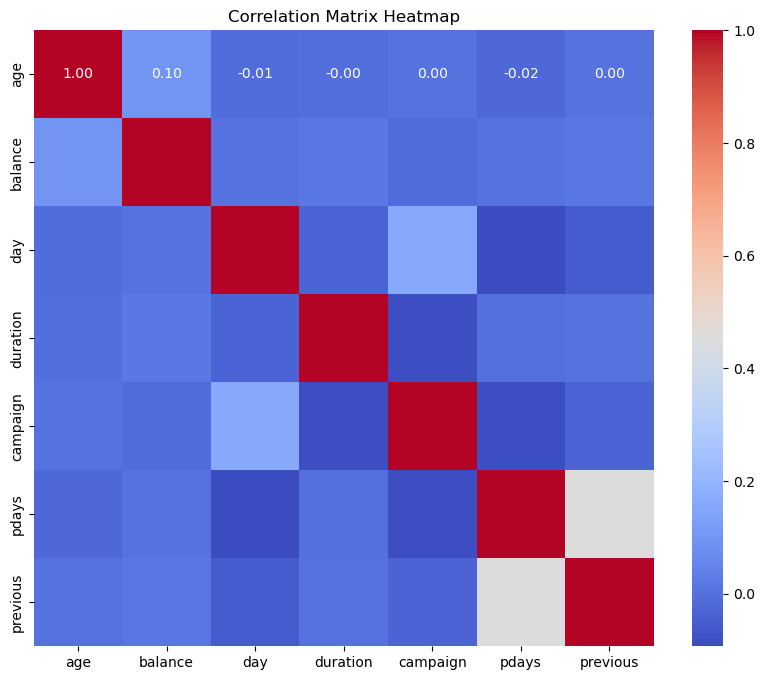

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix Heatmap')
plt.show()


Two features with the biggest correlation: `pdays` and `previous`

# Question 3

Question 3. Variable with the biggest mutual information score

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
np.random.seed(42)

In [54]:
df_fulltrain , df_test = train_test_split(df,test_size = 0.2, random_state= 1)
df_train , df_val = train_test_split(df,test_size = 0.25, random_state= 1)

In [56]:
y_fulltrain = df_fulltrain.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [57]:
del df_train['y']
del df_val['y']
del df_test['y']

In [58]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [59]:
def mutual_info(s):
    return mutual_info_score(s , y_train).round(2)

In [60]:
df.dtypes[df.dtypes == 'object']

job          object
marital      object
education    object
housing      object
contact      object
month        object
poutcome     object
dtype: object

In [61]:
cate =[ 'job','marital','education','housing','contact','month','poutcome']
val = df_train[cate].apply(mutual_info)
val.sort_values(ascending = False)

poutcome     0.03
month        0.02
job          0.01
housing      0.01
contact      0.01
marital      0.00
education    0.00
dtype: float64

Variable with the biggest mutual information score is poutcome     0.03

# Quesstion 4

Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

In [63]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
dv= DictVectorizer(sparse = False)

In [66]:
train_dicts = df_train[cate + nums].to_dict(orient = 'records')
x_train = dv.fit_transform(train_dicts)

In [72]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [74]:
val_dicts = df_val[cate + nums].to_dict(orient = 'records')
x_val = dv.transform(val_dicts)
x_val

array([[4.200e+01, 2.519e+03, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.700e+01, 2.209e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.200e+01, 9.230e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.800e+01, 5.920e+02, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.900e+01, 4.990e+02, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+01, 1.800e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)


In [78]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [80]:
model.coef_[0]

array([-1.29435795e-03,  1.90576782e-05, -9.10732545e-02,  2.35808173e-01,
        1.30106476e-01, -1.36686891e+00,  8.20363725e-03,  4.21289969e-03,
       -4.56757244e-01, -2.80190633e-01, -7.86917554e-02, -1.85314626e-01,
       -1.57192015e-01, -8.43762243e-01,  8.30139868e-02, -2.41482310e-01,
       -3.97187415e-01, -3.84867751e-01, -9.35075238e-02,  3.67158339e-01,
       -2.45977024e-01, -1.33606590e-01,  4.85451676e-01, -1.15036133e-01,
       -2.15922172e-01, -1.08991342e-01, -3.29997449e-01, -4.61768804e-01,
       -2.09188005e-01, -1.31682645e-01, -7.72734980e-01,  4.20258234e-01,
       -2.91666705e-01, -1.26786075e+00, -1.00386588e+00,  4.03624070e-01,
        1.40786610e+00, -4.98376312e-01, -9.48518466e-01,  8.81281340e-01,
        8.00721731e-01, -1.09250629e-04, -7.95725458e-01, -7.05253760e-01,
        1.39009870e+00, -8.90073742e-01,  2.15440692e-02])

In [81]:
model.intercept_[0]

-1.0009542586179763

In [84]:
model.predict_proba(x_train)[:,1]

array([0.11590814, 0.00757919, 0.00918706, ..., 0.03310316, 0.01223575,
       0.06487601])

In [85]:
y_pred = model.predict(x_val)

In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)

In [105]:
accuracy

0.9018844554543042

What accuracy did you get?  0.9

# Question 5

Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

In [96]:
y_pred = model.predict(x_val)
baseline_accuracy = accuracy_score(y_val, y_pred)
baseline_accuracy

0.9018844554543042

In [101]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,29,blue-collar,married,secondary,137,yes,cellular,17,apr,343,2,316,3,other
1,39,blue-collar,married,primary,830,yes,unknown,8,may,246,2,-1,0,unknown
2,30,technician,married,tertiary,1103,yes,cellular,29,jul,148,15,-1,0,unknown
3,25,services,single,secondary,229,yes,unknown,2,jun,214,2,-1,0,unknown
4,32,management,married,secondary,2858,yes,cellular,18,jul,247,5,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,50,technician,married,tertiary,1830,no,cellular,14,may,318,3,-1,0,unknown
33904,34,management,divorced,tertiary,528,yes,cellular,17,apr,233,2,-1,0,unknown
33905,48,management,married,tertiary,4191,no,unknown,21,may,363,6,-1,0,unknown
33906,45,admin.,married,unknown,1783,no,unknown,20,jun,11,11,-1,0,unknown


In [107]:
accuracy_differences = {}
feature_list = df_train.columns.tolist()
for feature in feature_list:
    x_train_excluded = df_train[cate + nums].drop(columns=[feature])
    x_val_excluded = df_val[cate + nums].drop(columns=[feature])

    train_dicts = x_train_excluded.to_dict(orient = 'records')
    x_train = dv.fit_transform(train_dicts)
    
    val_dicts = x_val_excluded.to_dict(orient = 'records')
    x_val = dv.transform(val_dicts)
    
    model.fit(x_train, y_train)
    y_pred_excluded = model.predict(x_val)

    accuracy_without_feature = accuracy_score(y_val, y_pred_excluded)

    accuracy_difference = baseline_accuracy - accuracy_without_feature

    accuracy_differences[feature] = accuracy_difference
    print(f"Accuracy without {feature}: {accuracy_without_feature:.4f} | Difference: {accuracy_difference:.4f}")



Accuracy without age: 0.9013 | Difference: 0.0006
Accuracy without job: 0.9021 | Difference: -0.0002
Accuracy without marital: 0.9006 | Difference: 0.0013
Accuracy without education: 0.9018 | Difference: 0.0001
Accuracy without balance: 0.9017 | Difference: 0.0002
Accuracy without housing: 0.9014 | Difference: 0.0005
Accuracy without contact: 0.9016 | Difference: 0.0003
Accuracy without day: 0.9015 | Difference: 0.0004
Accuracy without month: 0.9024 | Difference: -0.0005
Accuracy without duration: 0.8936 | Difference: 0.0083
Accuracy without campaign: 0.9021 | Difference: -0.0003
Accuracy without pdays: 0.9013 | Difference: 0.0006
Accuracy without previous: 0.9016 | Difference: 0.0003
Accuracy without poutcome: 0.8945 | Difference: 0.0074


'balance' feature has the smallest difference

# Question 6

Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [108]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_values =[0.01, 0.1, 1, 10, 100]
best_alpha = None
best_score = float('inf')

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    
    mse = mean_squared_error(y_val, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best MSE: {best_score}")


Best alpha: 0.01, Best MSE: 0.0775610547576251
